In [1]:
import pandas as pd
import numpy as np
def eda(dataframe):
    print(f"""
    
    -- dtypes --
    
    {dataframe.dtypes}
    
    -- NaN Values --
    
    {dataframe.isnull().sum()}
    
    -- Shape --
    
    {dataframe.shape}
    
    -- Unique --
    
    {dataframe.apply(lambda x: x.nunique())}
    
    -- Head --
    """)
       
    return dataframe.head()

def grab_col_names(dataframe, cat_th=10, car_th=20):
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

In [2]:

path = "/Users/mac/Desktop/fist hw/clinical_diag_293_strat_risk.txt"
  
clinical_diag_293_strat_risk = pd.read_csv(path, sep='\t')
clinical_diag_293_strat_risk = clinical_diag_293_strat_risk.drop_duplicates()

# display DataFrame
clinical_diag_293_strat_risk

,Пациент_экз,Данные,Код_МЭС,Наименование_МЭС,Статус,Клинический_диагноз,Тип_Документа,Услуга293_экз,Услуга186_экз,Эпизод_экз,Пациент_экз.1,Клинический_диагноз_рубрика
0,GACACJb,Нет данных,291260,Гипертоническая болезнь с нарушениями функции ...,ЗАКРЫТИЕ ЭПИЗОДА,I11.9,Нет данных,GACACJbAACAAN08:57Bc,GACACJbAACAAN08:57B,GACACJbAAC,GACACJb,I11.9
1,GACADNA,Нет данных,000,БЕЗ МЭС,ЗАКРЫТИЕ ЭПИЗОДА,I25.2 Перенесенный в прошлом инфаркт миокарда,Нет данных,GACADNAACAAAG17:27Ac,GACADNAACAAAG17:27A,GACADNAACA,GACADNA,I25.2
2,GACADWD,Нет данных,000,БЕЗ МЭС,ЗАКРЫТИЕ ЭПИЗОДА,I48,Нет данных,GACADWDAApAAJ14:24Ac,GACADWDAApAAJ14:24A,GACADWDAAp,GACADWD,I48
3,GACAIWU,Нет данных,000,БЕЗ МЭС,ЗАКРЫТИЕ ЭПИЗОДА,I67.2,Нет данных,GACAIWUAAUAAQ16:41Ac,GACAIWUAAUAAQ16:41A,GACAIWUAAU,GACAIWU,I67.2
4,GACAIДV,Нет данных,000,БЕЗ МЭС,ЗАКРЫТИЕ ЭПИЗОДА,G45.0,Нет данных,GACAIДVAAGAAG10:18Ac,GACAIДVAAGAAG10:18A,GACAIДVAAG,GACAIДV,G45.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14155,GACATеF,Нет данных,000,БЕЗ МЭС,ЗАКРЫТИЕ ЭПИЗОДА,Z94.1,Нет данных,GACATеFAhSAAC09:20A0,GACATеFAhSAAC09:20A,GACATеFAhS,GACATеF,Z94.1
14160,GACATеF,Нет данных,st36.006,"Отторжение, отмирание трансплантата органов и ...",ЗАКРЫТИЕ ЭПИЗОДА,T86.2,Нет данных,GACATеFAhgAAS09:59A#,GACATеFAhgAAS09:59A,GACATеFAhg,GACATеF,T86.2
14165,GACATеF,Нет данных,000,БЕЗ МЭС,ЗАКРЫТИЕ ЭПИЗОДА,Z94.1,Нет данных,GACATеFAhdAAT10:05A0,GACATеFAhdAAT10:05A,GACATеFAhd,GACATеF,Z94.1
14170,GACATP(,Нет данных,000,БЕЗ МЭС,ЗАКРЫТИЕ ЭПИЗОДА,Z94.1,Нет данных,GACATP(AMZAAz09:34A0,GACATP(AMZAAz09:34A,GACATP(AMZ,GACATP(,Z94.1


In [3]:
#to select potential columns
x = ['Данные','Статус','Статус','Тип_Документа','Услуга293_экз','Услуга186_экз','Пациент_экз.1','Клинический_диагноз','Наименование_МЭС']
clinical_diag_293_strat_risk = clinical_diag_293_strat_risk.drop(x, axis=1)
del x


In [4]:
#get dummy

clinical_diag_293_strat_risk_dummy = pd.get_dummies(clinical_diag_293_strat_risk, columns=['Код_МЭС'], prefix='', prefix_sep='')\
.groupby('Пациент_экз').max()

clinical_diag_293_strat_risk_dummy = clinical_diag_293_strat_risk_dummy.replace(False,0)
clinical_diag_293_strat_risk_dummy = clinical_diag_293_strat_risk_dummy.replace(True,1)

clinical_diag_293_strat_risk_dummy = clinical_diag_293_strat_risk_dummy.drop('000', axis=1)
Sum = len(clinical_diag_293_strat_risk)
clinical_diag_293_strat_risk_dummy


,Эпизод_экз,Клинический_диагноз_рубрика,190701,190705,190713,211180,211184,211350,211450,211470,...,вСХ005,вСХ006,вСХ007,вТО006,вТО011,вТО014,оА005,оА005а,оИ004,пК007
Пациент_экз,,,,,,,,,,,,,,,,,,,,,
GACAACH,GACAACHABH,I20.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GACAAIA,GACAAIAABu,I50.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GACAAYo,GACAAYoABM,I50.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GACAAkC,GACAAkCAAE,K25.1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GACABKF,GACABKFAAP,I49.5,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GACBB<5,GACBB<5AAB,I22,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GACBB>g,GACBB>gAAA,I20.8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GACBBEm,GACBBEmAAA,I20.8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
diagnosis_dummies = pd.get_dummies(clinical_diag_293_strat_risk, columns=['Клинический_диагноз_рубрика'], prefix='', prefix_sep='')\
.groupby('Пациент_экз').max()
diagnosis_dummies = diagnosis_dummies.reset_index()


In [6]:
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

#analisis for all patients
df_list=[]
chunk_size = 50000
path = '/Users/mac/Desktop/fist hw/all_analisis_risk_stratif.txt'

for chunk in pd.read_csv(path, chunksize=chunk_size,sep='\t'):
    df_list.append(chunk)


all_analisis_risk_stratif = pd.concat(df_list)
# display DataFrame
del df_list
all_analisis_risk_stratif

,Код_теста,Синоним,Наименование,Ед_изм,Значение,Значение_число,Комментарий,Дата_время_авторизации_результата,Метод_теста,Анализатор_рабочий_лист,...,Флаг_результата_теста,Себестоимость,Наименование_услуги_по_прайсу,Код_ОК_МУ,Код_внешний,Код_внешний_экз,Код_комплекса_услуги_по_прайсу,Подразделение,Лечащий_врач,Услуга294_экз
0,А0000,NaN,АЧТВ,сек.,46.8,"46,8",NaN,2014-09-25 11:04:08.000,NaN,STACOM2,...,H,"84,85",Активированное частичное тромбопластиновое вре...,A12.05.042,A12.05.042,GACAyABAH,NaN,КДЛ Акк,"Балушкина Мария Викторовна, Клинический ордина...",GACABOzAAwAAB11:04AAAA
1,А0000,NaN,АЧТВ,сек.,46.8,"46,8",NaN,2014-09-25 11:04:08.000,NaN,STACOM2,...,H,"84,85",Активированное частичное тромбопластиновое вре...,A12.05.042,A12.05.042,GACAyABAH,NaN,КДЛ Акк,"Балушкина Мария Викторовна, Клинический ордина...",GACABOzAAyAAA08:11QBAA
2,А0000,NaN,АЧТВ,сек.,42.9,"42,9",NaN,2014-11-19 12:21:03.000,NaN,STACOM2,...,H,"84,85",Активированное частичное тромбопластиновое вре...,A12.05.042,A12.05.042,GACAyABAH,NaN,КДЛ Акк,"Балушкина Мария Викторовна, Клинический ордина...",GACABOzABDAAB12:21AAAA
3,А0000,NaN,АЧТВ,сек.,42.9,"42,9",NaN,2014-11-19 12:21:03.000,NaN,STACOM2,...,H,"84,85",Активированное частичное тромбопластиновое вре...,A12.05.042,A12.05.042,GACAyABAH,NaN,КДЛ Акк,"Балушкина Мария Викторовна, Клинический ордина...",GACABOzABFAAA09:44BBAA
4,А0000,NaN,АЧТВ,сек.,>200.0,200,NaN,2014-10-07 10:35:26.000,NaN,NaN,...,H,"84,85",Активированное частичное тромбопластиновое вре...,A12.05.042,A12.05.042,GACAyABAH,NaN,КДЛ Акк,"Бобкова Елизавета Андреевна, Регистратура лабо...",GACADaBAAwAAA10:35AAAA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27931664,Э0061,NaN,FMetHb (вена),%,0.70,"0,7",NaN,2023-04-21 10:03:19.000,NaN,ABL8006,...,N,323,Анализ кислотно-щелочного равновесия и газовог...,B03.016.75,B03.016.75,GACAwBxAK,NaN,ЭКСЛАБ,"Бодянская Оксана Андреевна, Врач-анестезиолог-...",GACAZюQABDAAA09:22ABAA
27931665,Э0061,NaN,FMetHb (вена),%,0.80,"0,8",NaN,2023-04-21 19:11:32.000,NaN,ABL8006,...,N,323,Анализ кислотно-щелочного равновесия и газовог...,B03.016.75,B03.016.75,GACAwBxAK,NaN,ЭКСЛАБ,"Багдасарян Артур Юрьевич, Врач-сердечно-сосуди...",GACAZюQABEAAA19:01ABAA
27931666,Э0061,NaN,FMetHb (вена),%,1.30,"1,3",NaN,2023-04-21 22:25:25.000,NaN,ABL800,...,N,323,Анализ кислотно-щелочного равновесия и газовог...,B03.016.75,B03.016.75,GACAwBxAK,NaN,ЭКСЛАБ,"Багдасарян Артур Юрьевич, Врач-сердечно-сосуди...",GACAZюQABGAAA21:17ABAA
27931667,Э0061,NaN,FMetHb (вена),%,0.70,"0,7",NaN,2023-04-22 06:33:59.000,NaN,ABL8001,...,N,323,Анализ кислотно-щелочного равновесия и газовог...,B03.016.75,B03.016.75,GACAwBxAK,NaN,ЭКСЛАБ,"Багдасарян Артур Юрьевич, Врач-сердечно-сосуди...",GACAZюQABHAAA00:06DBAA


In [7]:

all_analisis_risk_stratif['Пациент_экз'] = all_analisis_risk_stratif['Услуга294_экз'].apply(lambda x:x[0:7])

In [8]:
# select potential columns
x = ['Услуга294_экз','Синоним','Наименование','Значение','Комментарий','Дата_время_авторизации_результата','Метод_теста'\
    ,'Анализатор_рабочий_лист','Себестоимость','Наименование_услуги_по_прайсу','Код_внешний_экз','Код_внешний',\
    'Код_комплекса_услуги_по_прайсу','Лечащий_врач']
all_analisis_risk_stratif = all_analisis_risk_stratif.drop(x, axis=1)
del x

In [9]:
# to make upper bound and lower bound from Нормы_для_теста in order to compare 
# with test result 

In [10]:
all_analisis_risk_stratif["Нормы_для_теста"].fillna("(0-0)", inplace = True)


In [11]:
import re
numeric_const_pattern = '[-+]? (?: (?: \d* \. \d+ ) | (?: \d+ \.? ) )(?: [Ee] [+-]? \d+ ) ?'
rx = re.compile(numeric_const_pattern, re.VERBOSE)
all_analisis_risk_stratif['range'] = all_analisis_risk_stratif['Нормы_для_теста'].apply(lambda x \
                                            : rx.findall(x))


In [12]:

numeric_const_pattern = '[-+]? (?: (?: \d* \. \d+ ) | (?: \d+ \.? ) )(?: [Ee] [+-]? \d+ ) ?'
rx = re.compile(numeric_const_pattern, re.VERBOSE)
all_analisis_risk_stratif['lower_bound'] = all_analisis_risk_stratif['range'].apply(lambda x \
                                            : float(x[0]) if len(x)==2 else 0)

del rx
del numeric_const_pattern

In [13]:
all_analisis_risk_stratif['upper_bound'] = all_analisis_risk_stratif['range'].apply(lambda x \
                                            : float(x[1]) if len(x)==2 else 0)

In [14]:
all_analisis_risk_stratif['Значение_число'] = all_analisis_risk_stratif['Значение_число'].apply(lambda x:float(str(x).replace(',','.')))



In [15]:
all_analisis_risk_stratif = all_analisis_risk_stratif[['Пациент_экз','Код_теста','Значение_число','lower_bound','upper_bound']]


In [16]:
# average value is used to fill nan
all_analisis_risk_stratif['average'] = (all_analisis_risk_stratif['lower_bound']+all_analisis_risk_stratif['upper_bound'])/2

all_analisis_risk_stratif = all_analisis_risk_stratif.drop(['lower_bound','upper_bound'],axis = 1)
all_analisis_risk_stratif = all_analisis_risk_stratif.groupby(['Пациент_экз','Код_теста']).mean(['Значение_число'])
all_analisis_risk_stratif = all_analisis_risk_stratif.reset_index() 
x = all_analisis_risk_stratif[['Код_теста','average']].drop_duplicates()                          
x = x.reset_index()
avg = x['average']                        
who_fail_test = pd.pivot_table(all_analisis_risk_stratif, values='Значение_число', index=['Пациент_экз'],columns=['Код_теста'])
code = who_fail_test.columns 
for i in range(len(code)):
    who_fail_test[code[i]] = who_fail_test[code[i]].fillna(avg[i])

In [17]:
clinical_diag_293_strat_risk_dummy = clinical_diag_293_strat_risk_dummy.reset_index()
#who_fail_test_dummy = who_fail_test_dummy.reset_index()

In [18]:
# people 

patient_test_ope  = pd.merge(clinical_diag_293_strat_risk_dummy, who_fail_test, how="inner", on = 'Пациент_экз')


In [19]:
personal_info = pd.merge(patient_test_ope, diagnosis_dummies, how="inner", on = 'Пациент_экз')

personal_info  = personal_info.replace(False , 0)
personal_info = personal_info.replace(True , 1)

personal_info =personal_info.drop(['Эпизод_экз_x', 'Клинический_диагноз_рубрика'],axis = 1).fillna(0)


del patient_test_ope
del diagnosis_dummies


In [20]:
path = '/Users/mac/Desktop/fist hw/final_obj_patient.txt'

final_obj_patient = pd.read_csv(path, sep='\t')
final_obj_patient.head()

,Источник_информации_о_дате_смерти,Группа_крови,Резус_фактор,Пол,Дата_рождения,Дата_время_рождения,Дата_смерти,Дата_время_смерти,Пациент_экз
0,Нет данных,A II,Нет данных,Женский,1925-08-01,NaN,NaN,NaN,GACAjxЖ
1,ЗАКРЫТИЕ ЭПИЗОДА,0 I,Нет данных,Мужской,1947-04-26,NaN,2020-06-26,2020-06-26 06:30:00.000,GACAk)Я
2,Нет данных,A II,Нет данных,Мужской,1947-02-14,NaN,NaN,NaN,GACAhъЛ
3,Нет данных,B III,Нет данных,Женский,1935-10-02,NaN,NaN,NaN,GACAIЕР
4,Нет данных,0 I,Нет данных,Женский,1967-06-08,NaN,NaN,NaN,GACAf+i


In [21]:
# remove columns with too much null
x= ['Дата_время_рождения','Дата_смерти','Дата_время_смерти','Резус_фактор','Источник_информации_о_дате_смерти']
final_obj_patient = final_obj_patient.drop(x, axis=1)


In [22]:
#convert birthday to age
from datetime import date
from datetime import datetime
today = date.today()
final_obj_patient['Дата_рождения']=final_obj_patient['Дата_рождения'].apply(lambda x: \
    datetime.strptime(x,'%Y-%m-%d').date())
final_obj_patient['age'] = final_obj_patient["Дата_рождения"].apply(lambda x: \
    today.year - x.year - ((today.month, today.day) < (x.month, x.day)))

In [23]:

model_data = pd.merge(personal_info, final_obj_patient, how="inner", on = 'Пациент_экз')
model_data = model_data.fillna(0)
del personal_info


model_data

,Пациент_экз,190701,190705,190713,211180,211184,211350,211450,211470,211480,...,Z93.3,Z94.1,Z94.3,Z94.8,Z95.2,Z96.6,Группа_крови,Пол,Дата_рождения,age
0,GACAACH,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,A II,Женский,1937-10-17,86
1,GACAAIA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,A II,Мужской,1947-09-23,76
2,GACAAYo,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,A II,Мужской,1960-09-15,63
3,GACAAkC,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,A II,Мужской,1962-06-18,61
4,GACABKF,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,B III,Мужской,1940-02-11,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4907,GACBB<5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,AB IV,Мужской,1955-07-09,68
4908,GACBB>g,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0 I,Женский,1947-06-02,76
4909,GACBBEm,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,A II,Мужской,1965-03-29,58
4910,GACBBEz,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,AB IV,Мужской,1946-08-25,77


In [24]:

path = "/Users/mac/Desktop/fist hw/epiz_inform_stationary_risks_10_events.csv"


epiz_inform_stationary_risks_10_events = pd.read_csv(path, sep='$')



In [25]:

path = '/Users/mac/Desktop/fist hw/final_obj_hospitalization.txt'

final_obj_hospitalization = pd.read_csv(path, sep='\t')
  


In [26]:
import pickle

path = '/Users/mac/Desktop/fist hw/all_epizodes_risks_strat.pkl'


all_epizodes_risks_strat = pd.read_pickle(path)  
all_epizodes_risks_strat

,Пациент_экз,Суточный_диурез_пациента,Рост_пациента,Количество_и_периодичность_назначений,Примечание_лабораторного_эпизода,Вес_пациента,Анамнез,Дата_направления_на_поступление,Дата_поступления,Дата_время_поступления,...,Коррекция_дата_время,Эпизод_экз,Пациент_экз.1,Код_профиля,Код_вида_ВМП_при_обращении,Код_вида_ВМП_при_выписке,Номер_группы_ВМП,Дата_обращения_в_МО,Дата и время КВС,Тип КВС
0,GACA\lf,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2016-10-27,2016-10-27 07:51:00.000,...,2016-10-27 07:51:11.000,GACA\lfAAa,GACA\lf,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,GACA\lf,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,...,2016-09-28 12:06:21.000,GACA\lfAAA,GACA\lf,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GACA\lf,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2016-09-28,NaN,...,2016-09-28 12:16:48.000,GACA\lfAAB,GACA\lf,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GACA\lf,NaN,NaN,3.0,NaN,NaN,NaN,NaN,2016-10-03,NaN,...,2016-10-03 10:58:35.000,GACA\lfAAC,GACA\lf,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,GACA\lf,NaN,NaN,1.0,NaN,NaN,NaN,NaN,2016-10-10,NaN,...,2016-10-10 13:27:41.000,GACA\lfAAE,GACA\lf,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985824,GACBB:/,NaN,167.0,4.0,NaN,66.0,NaN,NaN,2021-05-18,2021-05-18 22:27:00.000,...,2021-05-18 22:27:35.000,GACBB:/ADy,GACBB:/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
985825,GACBB:/,NaN,167.0,4.0,NaN,66.0,NaN,NaN,2021-05-14,2021-05-14 06:37:00.000,...,2021-05-14 06:37:57.000,GACBB:/ADY,GACBB:/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
985826,GACBB:/,NaN,167.0,8.0,NaN,66.0,NaN,NaN,2021-05-18,2021-05-18 22:32:00.000,...,2021-05-18 22:32:23.000,GACBB:/ADz,GACBB:/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
985827,GACBB:/,NaN,NaN,10.0,NaN,NaN,NaN,NaN,2021-05-14,2021-05-14 08:30:00.000,...,2021-05-14 08:30:36.000,GACBB:/ADZ,GACBB:/,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
path = '/Users/mac/Desktop/fist hw/all_epizodes_risks_strat.pkl'


all_epizodes_risks_strat = pd.read_pickle(path)
x = ['Вес_пациента','Суточный_диурез_пациента','Рост_пациента','Примечание_лабораторного_эпизода','Код_вида_ВМП_при_выписке', 'Номер_группы_ВМП', 'Дата_обращения_в_МО',
       'Дата и время КВС', 'Тип КВС','Дата_направления_на_поступление', 'Дата_поступления',
       'Дата_время_поступления', 'Дата_выполнения', 'Дата_завершения_эпизода',
       'Дата_время_завершения_эпизода', 'Код_ресурса', 'Код_специальности','Дата_госпитализации_плановая','Дата_постановки_клинического_диагноза','Описание_клинического_диагноза','Талон_ВМП','Лечащий_врач_код_экз','Код_профиля','Код_вида_ВМП_при_обращении'\
    ,'Эпизод_экз','Пациент_экз.1','Код_отделения',]
all_epizodes_risks_strat  = all_epizodes_risks_strat.drop(x,axis=1)




In [28]:
# find target disease 
epiz_inform_stationary_risks_10_events.loc[epiz_inform_stationary_risks_10_events['Тип КВС']=='желудочковая тахикардия','disease']=1
epiz_inform_stationary_risks_10_events.loc[epiz_inform_stationary_risks_10_events['Тип КВС']=='острый коронарный синдром','disease']=2
epiz_inform_stationary_risks_10_events.loc[epiz_inform_stationary_risks_10_events['Тип КВС']=='постоперационный медиастинит','disease']=3
epiz_inform_stationary_risks_10_events.loc[epiz_inform_stationary_risks_10_events['Тип КВС']=='острое нарушение мозгового кровообращения','disease']=4

epiz_inform_stationary_risks_10_events = epiz_inform_stationary_risks_10_events.fillna(0)

x = epiz_inform_stationary_risks_10_events[['Номер эпизода','disease']].drop_duplicates()





In [29]:
df1 = epiz_inform_stationary_risks_10_events.loc[epiz_inform_stationary_risks_10_events['Тип КВС'].str.contains("острый коронарный синдром", case=False)]

df2 = epiz_inform_stationary_risks_10_events.loc[epiz_inform_stationary_risks_10_events['Дата и время КВС'].str.contains("острый коронарный синдром", case=False)]

острый_коронарный_синдром = pd.concat([df1,df2]).drop_duplicates().reset_index(drop=True)



df1 = epiz_inform_stationary_risks_10_events.loc[epiz_inform_stationary_risks_10_events['Тип КВС'].str.contains("желудочковая тахикардия", case=False)]

df2 = epiz_inform_stationary_risks_10_events.loc[epiz_inform_stationary_risks_10_events['Дата и время КВС'].str.contains("желудочковая тахикардия", case=False)]

желудочковая_тахикардия = pd.concat([df1,df2]).drop_duplicates().reset_index(drop=True)


df1 = epiz_inform_stationary_risks_10_events.loc[epiz_inform_stationary_risks_10_events['Тип КВС'].str.contains("острое нарушение мозгового кровообращения", case=False)]

df2 = epiz_inform_stationary_risks_10_events.loc[epiz_inform_stationary_risks_10_events['Дата и время КВС'].str.contains("острое нарушение мозгового кровообращения", case=False)]

онмк = pd.concat([df1,df2]).drop_duplicates().reset_index(drop=True)


df1 = epiz_inform_stationary_risks_10_events.loc[epiz_inform_stationary_risks_10_events['Тип КВС'].str.contains("постоперационный медиастинит", case=False)]

df2 = epiz_inform_stationary_risks_10_events.loc[epiz_inform_stationary_risks_10_events['Дата и время КВС'].str.contains("постоперационный медиастинит", case=False)]

медиастинит = pd.concat([df1,df2]).drop_duplicates().reset_index(drop=True)

print(len(желудочковая_тахикардия))
print(len(острый_коронарный_синдром))
print(len(медиастинит))
print(len(онмк))





1723
712
46
437


In [30]:
# x = epiz_inform_stationary_risks_10_events.drop(['Дата и время КВС','Тип КВС'],axis = 1)
for i in желудочковая_тахикардия['Номер эпизода'] : 
    all_epizodes_risks_strat.loc[all_epizodes_risks_strat['Номер_эпизода']==i,'желудочковая_тахикардия']= 1
for i in острый_коронарный_синдром['Номер эпизода'] : 
    all_epizodes_risks_strat.loc[all_epizodes_risks_strat['Номер_эпизода']==i,'острый_коронарный_синдром']= 1
for i in медиастинит['Номер эпизода'] : 
    all_epizodes_risks_strat.loc[all_epizodes_risks_strat['Номер_эпизода']==i,'медиастинит']= 1
for i in онмк['Номер эпизода'] : 
    all_epizodes_risks_strat.loc[all_epizodes_risks_strat['Номер_эпизода']==i,'онмк']= 1
    
    

In [31]:
disease_info = all_epizodes_risks_strat[['Пациент_экз','желудочковая_тахикардия','острый_коронарный_синдром',\
                                        'медиастинит','онмк']].drop_duplicates()
disease_info = disease_info.fillna(0)


In [32]:
aggregation_functions = {'желудочковая_тахикардия': 'sum', 'острый_коронарный_синдром': 'sum', 'медиастинит': 'sum'\
                        , 'онмк': 'sum'}
disease_info = disease_info.groupby(disease_info['Пациент_экз']).aggregate(aggregation_functions)

In [33]:
disease_info['желудочковая_тахикардия'] = disease_info['желудочковая_тахикардия'].apply(lambda x : 1 if x >= 1 else 0 )
disease_info['острый_коронарный_синдром'] = disease_info['острый_коронарный_синдром'].apply(lambda x : 1 if x >= 1 else 0 )
disease_info['медиастинит'] = disease_info['медиастинит'].apply(lambda x : 1 if x >= 1 else 0 )
disease_info['онмк'] = disease_info['онмк'].apply(lambda x : 1 if x >= 1 else 0 )



In [34]:
model_data = pd.merge(disease_info, model_data, how="inner", on = 'Пациент_экз')
model_data = model_data.drop('Дата_рождения',axis = 1)


In [35]:
model_data['Пол'] = model_data['Пол'].replace('Женский',0).replace('Мужской',1)
model_data = pd.get_dummies(model_data, columns=['Группа_крови'], prefix='', prefix_sep='')\
.groupby('Пациент_экз').max()

In [36]:
mask = model_data['Пол'] == 'Пенсионер'
mask1 = model_data['Пол'] == 'Работающий'
# select all rows except the ones that contain 'Coca Cola'
model_data = model_data[~mask]
model_data = model_data[~mask1]

model_data['Пол'] = model_data['Пол'].apply(lambda x:float(x))
#model_data = model_data.drop(['Код_МЭС','Эпизод_экз_y','Нет данных'],axis = 1)
model_data = model_data.replace(False,0)
model_data = model_data.replace(True,1)
model_data = model_data.drop('Код_МЭС',axis=1)
model_data = model_data.drop('Эпизод_экз_y',axis = 1)
model_data = model_data.drop('Нет данных',axis= 1)

In [347]:
# model_data is final datasets 
# please use code in this cell to upload data

path = 'final_datasets/out.csv'
model_data = pd.read_csv(path)  
model_data

,Пациент_экз,желудочковая_тахикардия,острый_коронарный_синдром,медиастинит,онмк,190701,190705,190713,211180,211184,...,Z94.8,Z95.2,Z96.6,Пол,age,0 I,A II,A2B IV,AB IV,B III
0,GACAACH,0,0,0,0,0,0,0,0,0,...,0,0,0,0.0,86,0,1,0,0,0
1,GACAAIA,1,0,0,0,0,0,0,0,0,...,0,0,0,1.0,76,0,1,0,0,0
2,GACAAYo,1,0,0,0,0,0,0,0,0,...,0,0,0,1.0,63,0,1,0,0,0
3,GACAAkC,0,0,0,0,0,0,0,0,0,...,0,0,0,1.0,61,0,1,0,0,0
4,GACABKF,1,0,0,0,0,0,0,0,0,...,0,0,0,1.0,83,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4904,GACBB<5,1,0,0,0,0,0,0,0,0,...,0,0,0,1.0,68,0,0,0,1,0
4905,GACBB>g,0,0,0,0,0,0,0,0,0,...,0,0,0,0.0,76,1,0,0,0,0
4906,GACBBEm,0,0,0,0,0,0,0,0,0,...,0,0,0,1.0,58,0,1,0,0,0
4907,GACBBEz,0,0,0,0,0,0,0,0,0,...,0,0,0,1.0,77,0,0,0,1,0


In [ ]:
# from below ,step for model training

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report , roc_auc_score , f1_score
from sklearn.neural_network import MLPClassifier

In [38]:
#test 
import xgboost as xgb

import warnings

warnings.filterwarnings("ignore")

cols = ['желудочковая_тахикардия','острый_коронарный_синдром',\
                                        'медиастинит','онмк']
X = model_data.drop(
               cols,axis=1)
for i in cols:
    print(f"{i} :")
    col = i
    
    y = model_data[col]

    X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

    names = ['xgb']

    classifiers = [xgb.XGBClassifier(objective="binary:logistic", random_state=42, eval_metric="auc")]

    X_train = X_train
    X_test = X_test

    for name, model in zip(names, classifiers):
        model.fit(X_train, y_train)
        y_test_pred = model.predict(X_test)
        print(f'{name} :')
        print('f1 : {:.6f}'.format(
                f1_score(y_test, y_test_pred,average='macro')
        )) 

желудочковая_тахикардия :
xgb :
f1 : 0.688875
острый_коронарный_синдром :
xgb :
f1 : 0.734237
медиастинит :
xgb :
f1 : 0.498297
онмк :
xgb :
f1 : 0.623764


In [39]:
#feature selection with pearson test

In [40]:
import numpy as np

# Create correlation matrix
corr_matrix = model_data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))



желудочковая_тахикардия best at 0.8333333333333335
острый_коронарный_синдром best at 0.7666666666666668
медиастинит best at 0.3666666666666667
онмк best at 0.6333333333333333


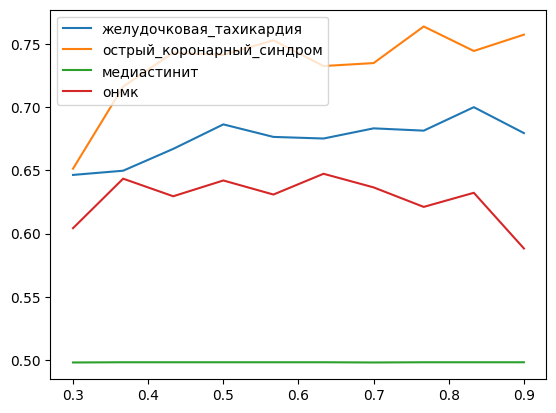

In [41]:
import matplotlib.pyplot as plt
interval = np.linspace(0.3,0.9,10).tolist()
interval
cols = ['желудочковая_тахикардия','острый_коронарный_синдром','медиастинит',\
                                        'онмк']
rates = []
for i in range(len(cols)) :
    points =[]
    best = 0
    ind = 0
    for j in interval:    
        to_drop = [column for column in upper.columns if any(upper[column] > j)]
        a  = model_data.drop(to_drop,axis=1)
        #a = pd.merge(a,model_data[['острый_коронарный_синдром','онмк']], how="left", on = 'Пациент_экз')

        col = cols[i]
        X = a.drop(cols,axis=1)
        y = a[col]

        X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=0)

        model = xgb.XGBClassifier(objective="binary:logistic", random_state=42, eval_metric="auc")
        model.fit(X_train, y_train)
        y_test_pred = model.predict(X_test)
       # print('f1 : {:.6f}'.format(f1_score(y_test, y_test_pred,average='macro') ))
        if(best < f1_score(y_test, y_test_pred,average='macro')):
            best = f1_score(y_test, y_test_pred,average='macro')
            ind = j
            
        points.append(f1_score(y_test, y_test_pred,average='macro'))
    print(f'{col} best at {ind}')
    rates.append(ind)
    plt.plot(interval, points,label=col)
plt.legend()
plt.show()


In [42]:

from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
# original 

cols = ['желудочковая_тахикардия','острый_коронарный_синдром','медиастинит',\
                                        'онмк']

for i in range(len(cols)):
    col = cols[i]
    print(f'{col} :')
    to_drop = [column for column in upper.columns if any(upper[column] > rates[i])]

    a  = model_data.drop(to_drop,axis=1)

    X = a.drop(cols,axis=1)
    y = a[col]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=0)

    scaler = StandardScaler()
    scaler.fit(X_train)
    sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l2'))
    sel_.fit(scaler.transform(X_train), y_train)
    selected_feat = X_train.columns[(sel_.get_support())]
    print('total features: {}'.format((X_train.shape[1])))
    print('selected features: {}'.format(len(selected_feat)))
    print('features with coefficients shrank to zero: {}'.format(
          np.sum(sel_.estimator_.coef_ == 0)))
    X_train_selected = sel_.transform(X_train)
    X_test_selected = sel_.transform(X_test)
    X_train_selected.shape, X_test_selected.shape
    model = xgb.XGBClassifier(objective="binary:logistic", random_state=42, eval_metric="auc")
    model.fit(X_train_selected, y_train)
    y_test_pred = model.predict(X_test_selected)
    print('f1 : {:.6f}'.format(
            f1_score(y_test, y_test_pred,average='macro')

    ))
    print()

желудочковая_тахикардия :
total features: 2285
selected features: 777
features with coefficients shrank to zero: 198
f1 : 0.694604

острый_коронарный_синдром :
total features: 2148
selected features: 630
features with coefficients shrank to zero: 195
f1 : 0.739063

медиастинит :
total features: 1012
selected features: 265
features with coefficients shrank to zero: 134
f1 : 0.498297

онмк :
total features: 1757
selected features: 602
features with coefficients shrank to zero: 167
f1 : 0.601552



In [233]:
# using original data to do L2 regularization

In [307]:

# original 

cols = ['желудочковая_тахикардия','острый_коронарный_синдром','медиастинит',\
                                        'онмк']

colA = []
colB = []
colC = []

for i in range(len(cols)):
    col = cols[i]
    print(f'{col} :')

    X = model_data.drop(cols,axis=1)
    y = model_data[col]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=0)

    scaler = StandardScaler()
    scaler.fit(X_train)
    sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l2'))
    sel_.fit(scaler.transform(X_train), y_train)
    selected_feat = X_train.columns[(sel_.get_support())]
    print('total features: {}'.format((X_train.shape[1])))
    print('selected features: {}'.format(len(selected_feat)))
    if(i == 0) :
        colA.extend(selected_feat)
    elif(i == 1) :
        colB.extend(selected_feat)
    elif(i == 3) :
        colC.extend(selected_feat)
    print('features with coefficients shrank to zero: {}'.format(
          np.sum(sel_.estimator_.coef_ == 0)))
    X_train_selected = sel_.transform(X_train)
    X_test_selected = sel_.transform(X_test)
    X_train_selected.shape, X_test_selected.shape
    model = xgb.XGBClassifier(objective="binary:logistic", random_state=42, eval_metric="auc")
    model.fit(X_train_selected, y_train)
    y_test_pred = model.predict(X_test_selected)
    print('f1 : {:.6f}'.format(
            f1_score(y_test, y_test_pred,average='macro')

    ))
    print()

желудочковая_тахикардия :
total features: 3117
selected features: 957
features with coefficients shrank to zero: 248
f1 : 0.688903

острый_коронарный_синдром :
total features: 3117
selected features: 812
features with coefficients shrank to zero: 248
f1 : 0.739063

медиастинит :
total features: 3117
selected features: 696
features with coefficients shrank to zero: 248
f1 : 0.498297

онмк :
total features: 3117
selected features: 853
features with coefficients shrank to zero: 248
f1 : 0.621151



In [308]:
# list of features (need to extract and save it as txt file)
items = open('tests.txt','r')
tests = []
for item in items:
      tests.append(item)
for i in range(len(tests)) :
    tests[i]=tests[i][:-1]

items = open('operations.txt','r')
operations = []
for item in items:
      operations.append(item)
for i in range(len(operations)) :
    operations[i]=operations[i][:-1]


items = open('diagnosis.txt','r')
diagnosis = []
for item in items:
      diagnosis.append(item)
for i in range(len(diagnosis)) :
    diagnosis[i]=diagnosis[i][:-1]

In [309]:
print(f'original num of is {len(colA)}')
count = 0
num_test = []
num_ops = []
num_diag = []

for i in colA :
    if(i in tests):
        num_test.append(i)
        count+=1
    elif(i+' ' in tests):
        num_test.append(i+' ')
        count+=1
    if(i in operations):
        num_ops.append(i)
        count+=1
    elif(i+' ' in operations):
        num_ops.append(i+' ')
        count+=1
    if(i in diagnosis):
        num_diag.append(i)
        count+=1
    elif(i+' ' in diagnosis):
        num_diag.append(i+' ')
        count+=1
print()
    
print(f'test feature is {len(num_test)}')
print(f'operations feature is {len(num_ops)}')
print(f'diagnosis feature is {len(num_diag)}')
print()

print(f'confirmed num is {count}')

colAA = colA.copy()
for i in num_test:
    colAA.remove(i)

for i in num_ops:
    colAA.remove(i)

for i in num_diag:
    colAA.remove(i)
print('target желудочковая_тахикардия , importatn feature from personal info :')    
print(colAA)

original num of is 957

test feature is 606
operations feature is 154
diagnosis feature is 194

confirmed num is 954
target желудочковая_тахикардия , importatn feature from personal info :
['Пол', 'age', '0 I']


In [310]:
# col B has important feature from personal info 
print(f'original num of is {len(colB)}')
count = 0
num_test = []
num_ops = []
num_diag = []

for i in colB :
    if(i in tests):
        num_test.append(i)
        count+=1
    elif(i+' ' in tests):
        num_test.append(i+' ')
        count+=1
    if(i in operations):
        num_ops.append(i)
        count+=1
    elif(i+' ' in operations):
        num_ops.append(i+' ')
        count+=1
    if(i in diagnosis):
        num_diag.append(i)
        count+=1
    elif(i+' ' in diagnosis):
        num_diag.append(i+' ')
        count+=1
print()

print(f'test feature is {len(num_test)}')
print(f'operations feature is {len(num_ops)}')
print(f'diagnosis feature is {len(num_diag)}')
print()

print(f'confirmed num is {count}')

colBB = colB.copy()
for i in num_test:
    colBB.remove(i)

for i in num_ops:
    colBB.remove(i)

for i in num_diag:
    colBB.remove(i)
print('target острый_коронарный_синдром , importatn feature from personal info :')    
print(colBB)


original num of is 812

test feature is 530
operations feature is 125
diagnosis feature is 153

confirmed num is 808
target острый_коронарный_синдром , importatn feature from personal info :
['age', 'A II', 'AB IV', 'B III']


In [311]:
print(f'original num of is {len(colC)}')
count = 0
num_test = []
num_ops = []
num_diag = []

for i in colC :
    if(i in tests):
        num_test.append(i)
        count+=1
    elif(i+' ' in tests):
        num_test.append(i+' ')
        count+=1
    if(i in operations):
        num_ops.append(i)
        count+=1
    elif(i+' ' in operations):
        num_ops.append(i+' ')
        count+=1
    if(i in diagnosis):
        num_diag.append(i)
        count+=1
    elif(i+' ' in diagnosis):
        num_diag.append(i+' ')
        count+=1
print()
    
print(f'test feature is {len(num_test)}')
print(f'operations feature is {len(num_ops)}')
print(f'diagnosis feature is {len(num_diag)}')
print()

print(f'confirmed num is {count}')

colCC = colC.copy()
for i in num_test:
    colCC.remove(i)

for i in num_ops:
    colCC.remove(i)

for i in num_diag:
    colCC.remove(i)
print('target онмк , importatn feature from personal info :')    
print(colCC)

original num of is 853

test feature is 530
operations feature is 149
diagnosis feature is 169

confirmed num is 848
target онмк , importatn feature from personal info :
['Пол', 'age', '0 I', 'A II', 'AB IV']


In [312]:
# use first and second target to find more details from SHAPLEY
colA.append('желудочковая_тахикардия')
colB.append('острый_коронарный_синдром')
colC.append('онмк')
model_dataA = model_data[colA]
model_dataB = model_data[colB]
model_dataC = model_data[colC]

In [313]:
from sklearn.metrics import roc_curve, roc_auc_score

#train with extracted data
X = model_dataA.drop(
               'желудочковая_тахикардия',axis=1)
y = model_dataA['желудочковая_тахикардия']
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=0)
model = xgb.XGBClassifier(objective="binary:logistic", random_state=42, eval_metric="auc")



model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
print('f1 : {:.6f}'.format(
        f1_score(y_test, y_test_pred,average='macro')
))
f1a = f1_score(y_test, y_test_pred,average='macro')
false_positive_rate1, true_positive_rate1, threshold1 =  roc_curve(y_test, model.predict_proba(X_test)[:, 1])

f1 : 0.688903


In [314]:
import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns.values.tolist(),
                                                  class_names='желудочковая_тахикардия', verbose=True, mode='classification')


In [315]:
j = 5
print("Prediction : ", y_test_pred[j])
print("Actual :     ", y_test[j])

Prediction :  1
Actual :      1


In [316]:
exp = explainer.explain_instance(X_test.values[j], model.predict_proba, num_features=15)

Intercept 3.231815765434578
Prediction_local [0.19504676]
Right: 0.8762172


[('Х0040  <= 0.00', -0.41603582755523666),
 ('I47.2 <= 0.00', -0.3764757709683776),
 ('ПЭ0007 <= 9.00', -0.31353679289667014),
 ('I40.0 <= 0.00', -0.30093593661073004),
 ('I05 <= 0.00', -0.2670429572149312),
 ('M65.8 <= 0.00', -0.2556851381997499),
 ('Б0110  <= 44.00', -0.25561329678671807),
 ('ЛБ0044 <= 87.13', -0.2359725773111284),
 ('291240 <= 0.00', -0.2073977828615668),
 ('В0002  <= 2.65', -0.1879240689672973),
 ('оИ004 <= 0.00', -0.16082189171661412),
 ('st12.013 <= 0.00', -0.0712263052837618),
 ('D37.7 <= 0.00', -0.06820667257925493),
 ('вТО006 <= 0.00', 0.042213580490080956),
 ('М0304  <= 0.40', 0.037892428781658306)]

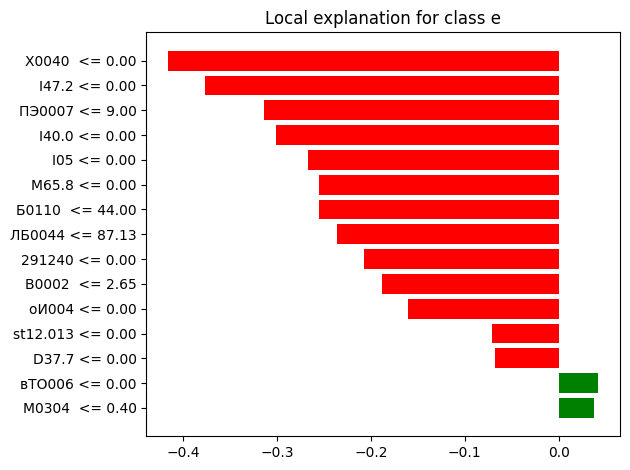

In [317]:
exp.as_pyplot_figure()
from matplotlib import pyplot as plt
plt.tight_layout()
exp.as_list()

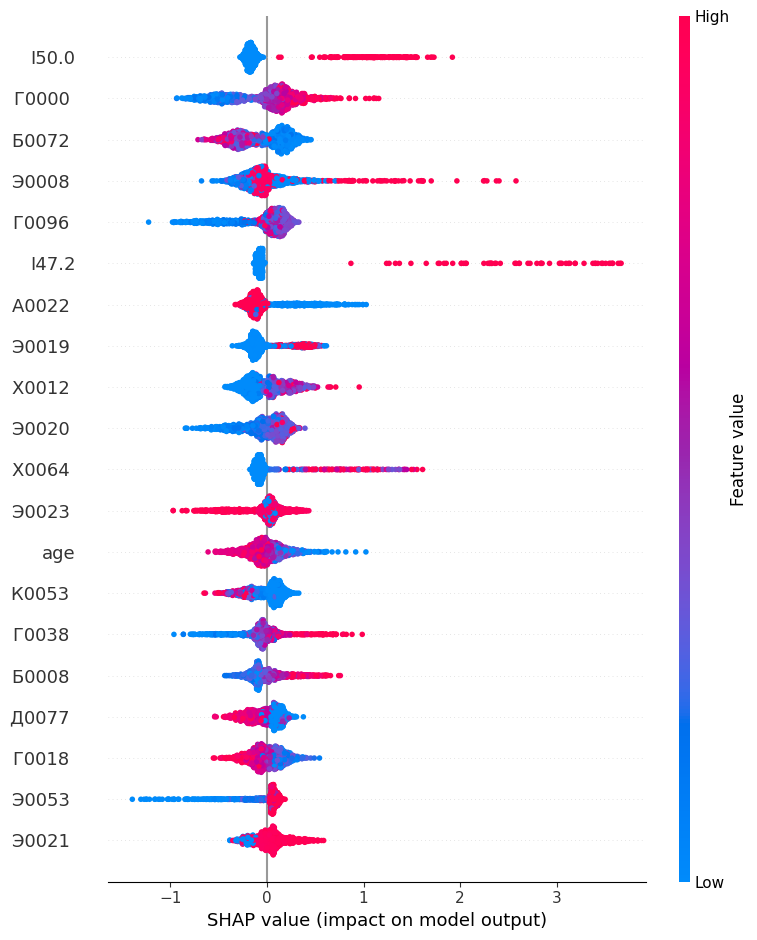

In [318]:
import shap


# Create the explainer
explainer = shap.TreeExplainer(model)

shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

In [319]:
#feature selection by shapley to train model 
import numpy as np
vals= np.abs(shap_values).mean(0)
feature_importance = pd.DataFrame(list(zip(X_train.columns,vals)),columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'],ascending=False,inplace=True)
feature_importance = feature_importance[feature_importance['feature_importance_vals']!=0]

col_impo = feature_importance['col_name'].tolist()


In [320]:
# try model with shapley important features

from collections import Counter

col_impo.append('желудочковая_тахикардия')
model_dataD = model_data[col_impo]
X = model_dataD.drop(
               'желудочковая_тахикардия',axis=1)
y = model_dataD['желудочковая_тахикардия']
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=0)


counter = Counter(y_train)
print(counter)

model = xgb.XGBClassifier(objective="binary:logistic", random_state=42, eval_metric="auc")


model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
print('f1 : {:.6f}'.format(
        f1_score(y_test, y_test_pred,average='macro')
))

print(classification_report(y_test, y_test_pred))


Counter({0: 2482, 1: 954})
f1 : 0.694047
              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1065
           1       0.65      0.45      0.53       408

    accuracy                           0.78      1473
   macro avg       0.73      0.68      0.69      1473
weighted avg       0.77      0.78      0.77      1473



In [321]:
# minus 1 because it is target column
print(f'before shapley extraction is {len(colA)-1}')
count = 0
num_test = []
num_ops = []
num_diag = []
colBB = col_impo.copy()

for i in col_impo :
    if(i in tests):
        num_test.append(i)
        colBB.remove(i)
    elif(i+' ' in tests):
        num_test.append(i+' ')
        colBB.remove(i+' ')
    if(i in operations):
        num_ops.append(i)
        colBB.remove(i)
    elif(i+' ' in operations):
        num_ops.append(i+' ')
        colBB.remove(i+' ')
    if(i in diagnosis):
        num_diag.append(i)
        colBB.remove(i)
    elif(i+' ' in diagnosis):
        num_diag.append(i+' ')
        colBB.remove(i+' ')
    if(i == 'желудочковая_тахикардия'):
        col_impo.remove(i)
        colBB.remove(i)

print('target желудочковая_тахикардия , importatn feature from personal info :')    
print(colBB)

print()

print(f'test feature is {len(num_test)}')
print(f'operations feature is {len(num_ops)}')
print(f'diagnosis feature is {len(num_diag)}')
print()

print(f'currect num is {len(col_impo)}')

before shapley extraction is 957
target желудочковая_тахикардия , importatn feature from personal info :
['age', 'Пол', '0 I']

test feature is 217
operations feature is 10
diagnosis feature is 12

currect num is 242


roc auc score is : 0.7595139464236398


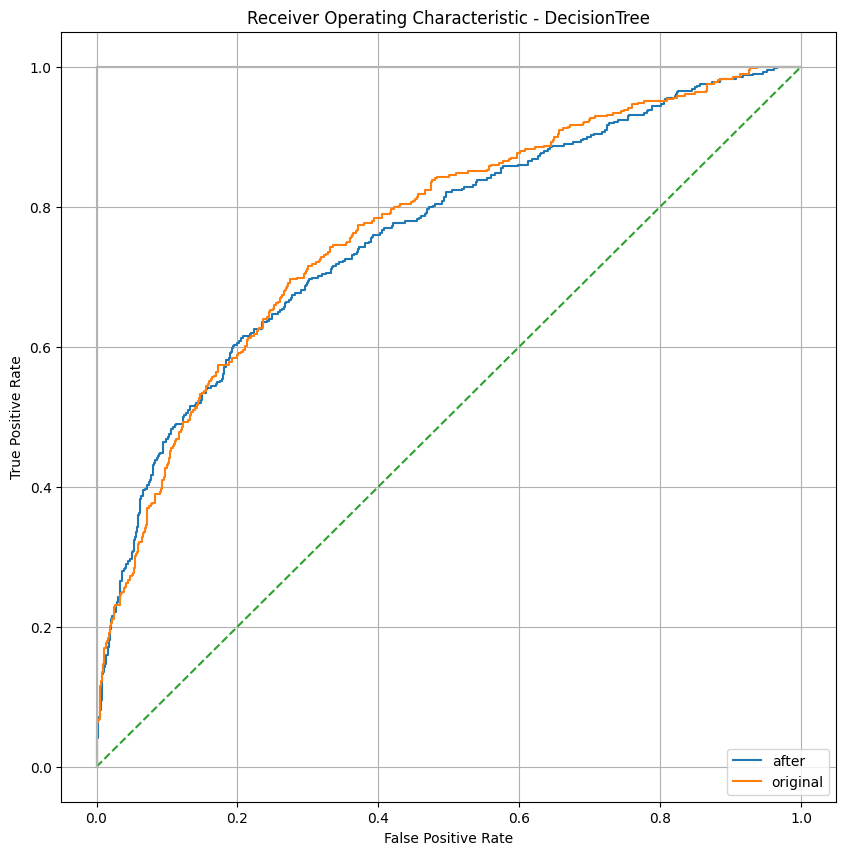

In [322]:
from sklearn.metrics import roc_curve, roc_auc_score
score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f"roc auc score is : {score}")
false_positive_rate, true_positive_rate = false_positive_rate1, true_positive_rate1
false_positive_rate1, true_positive_rate1, threshold1 =  roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1,label='after')
plt.plot(false_positive_rate, true_positive_rate , label='original')

plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid()
plt.legend()
plt.show()

Counter({0: 2482, 1: 2482})
f1 : 0.680435
              precision    recall  f1-score   support

           0       0.81      0.86      0.84      1065
           1       0.57      0.48      0.52       408

    accuracy                           0.76      1473
   macro avg       0.69      0.67      0.68      1473
weighted avg       0.75      0.76      0.75      1473

roc auc score is : 0.7533508238976342


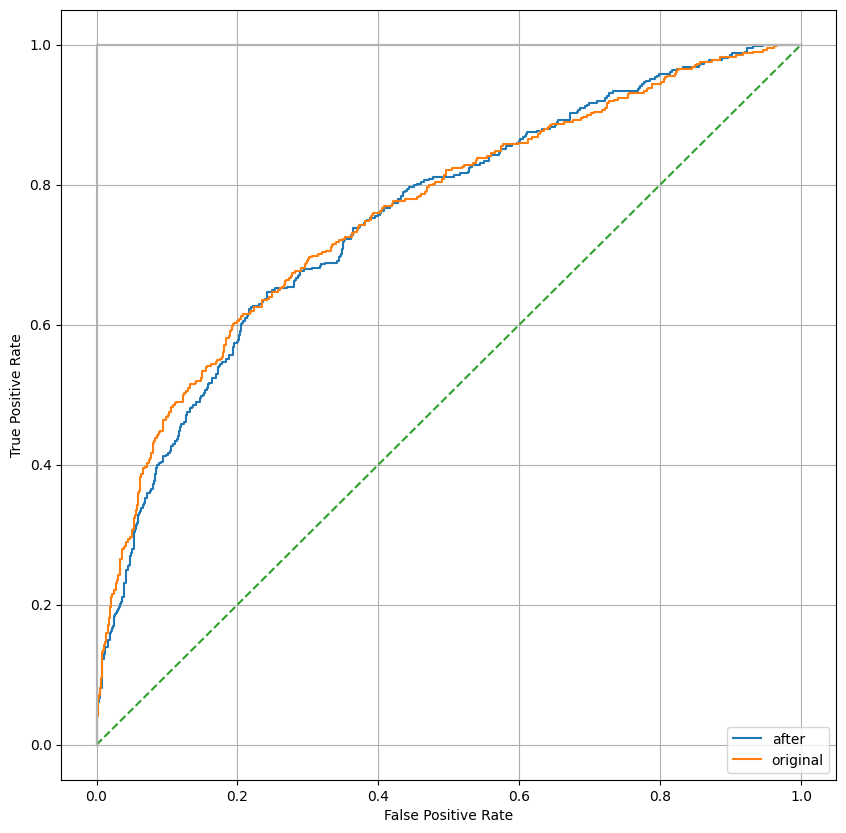

In [323]:
# this oversamepling algorithm just duplicated datas from minority class 
# it can have good quality in training but bad in generatlization 

from imblearn.over_sampling import SMOTE

# ------- oversampling ----------
oversample = RandomOverSampler(sampling_strategy='minority')

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=0)

# fit and apply the transform
oversample = SMOTE()
X_over, y_over = oversample.fit_resample(X_train, y_train)
counter = Counter(y_over)
print(counter)



# ------- Train model ----------

model = xgb.XGBClassifier(objective="binary:logistic", random_state=42, eval_metric="auc")


model.fit(X_over, y_over)
y_test_pred = model.predict(X_test)
print('f1 : {:.6f}'.format(
        f1_score(y_test, y_test_pred,average='macro')
))



print(classification_report(y_test, y_test_pred))

# ------- save model ----------

import pickle
import os  
os.makedirs('final_datasets', exist_ok=True) 
filename = 'final_datasets/желудочковая_тахикардия.pickle'
pickle.dump(model, open(filename, 'wb'))


# ------- rou_auc ----------

score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f"roc auc score is : {score}")
false_positive_rate,true_positive_rate = false_positive_rate1 , true_positive_rate1
false_positive_rate1, true_positive_rate1, threshold1 =  roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.subplots(1, figsize=(10,10))

plt.plot(false_positive_rate1, true_positive_rate1,label='after')
plt.plot(false_positive_rate, true_positive_rate , label='original')

plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.grid()
plt.show()

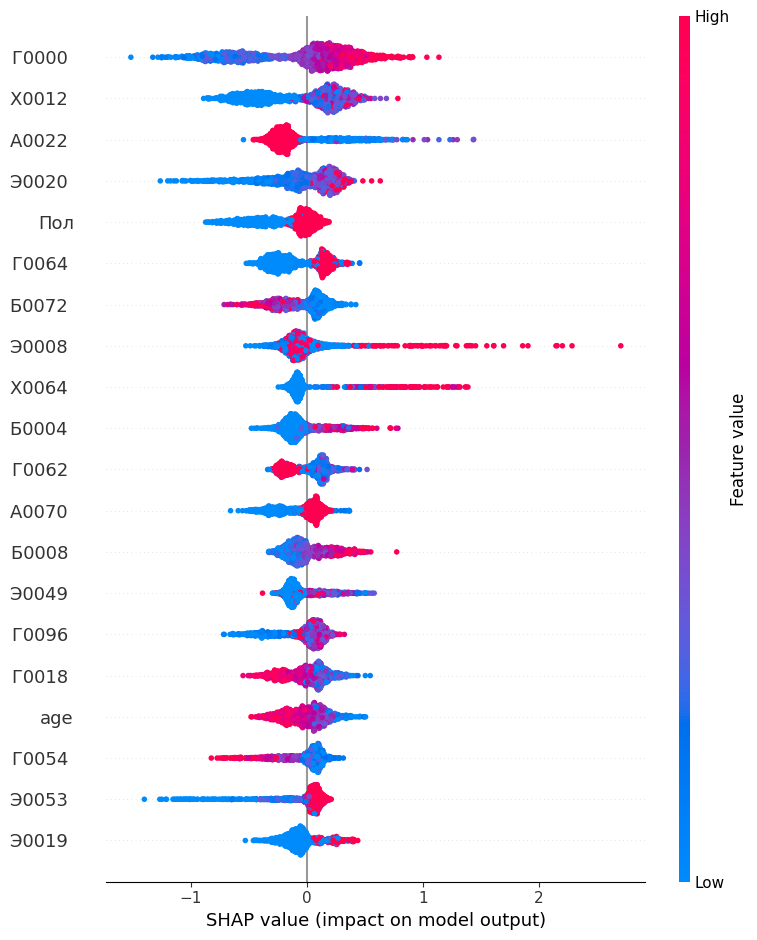

In [324]:
explainer = shap.TreeExplainer(model)

shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

In [325]:
#try with target острый_коронарный_синдром

In [326]:
#to calculate original roc auc score 
X = model_dataB.drop(
               'острый_коронарный_синдром',axis=1)
y = model_dataB['острый_коронарный_синдром']
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=0)
model = xgb.XGBClassifier(objective="binary:logistic", random_state=42, eval_metric="auc")


model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
print('f1 : {:.6f}'.format(
        f1_score(y_test, y_test_pred,average='macro')
))
f1b = f1_score(y_test, y_test_pred,average='macro')
false_positive_rate, true_positive_rate, threshold =  roc_curve(y_test, model.predict_proba(X_test)[:, 1])
score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f"roc auc score is : {score}")

f1 : 0.739063
roc auc score is : 0.8757214941735942


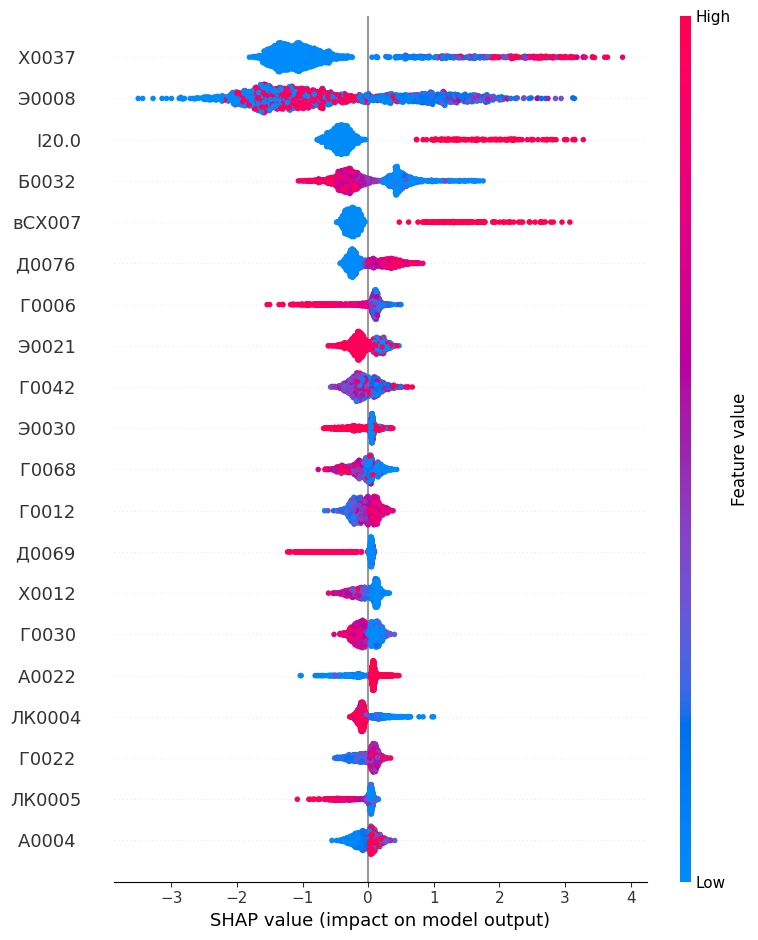

In [327]:
#feature selection to train model 

# Create the explainer

# Create the explainer
explainer = shap.TreeExplainer(model)

shap_values = explainer.shap_values(X_test)

# paint graph
shap.summary_plot(shap_values, X_test)

vals= np.abs(shap_values).mean(0)
feature_importance = pd.DataFrame(list(zip(X_train.columns,vals)),columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'],ascending=False,inplace=True)
feature_importance = feature_importance[feature_importance['feature_importance_vals']!=0]

col_impo = feature_importance['col_name'].tolist()


In [328]:
# model after less features 
col_impo.append('острый_коронарный_синдром')
model_dataD = model_data[col_impo]
X = model_dataD.drop(
               'острый_коронарный_синдром',axis=1)
y = model_dataD['острый_коронарный_синдром']
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=0)
counter = Counter(y_train)
print(counter)


model = xgb.XGBClassifier(objective="binary:logistic", random_state=42, eval_metric="auc")


model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
print('f1 : {:.6f}'.format(
        f1_score(y_test, y_test_pred,average='macro')
))

print(classification_report(y_test, y_test_pred))

Counter({0: 3010, 1: 426})
f1 : 0.737829
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1304
           1       0.76      0.40      0.52       169

    accuracy                           0.92      1473
   macro avg       0.84      0.69      0.74      1473
weighted avg       0.91      0.92      0.90      1473



roc auc score is : 0.8838031364576906


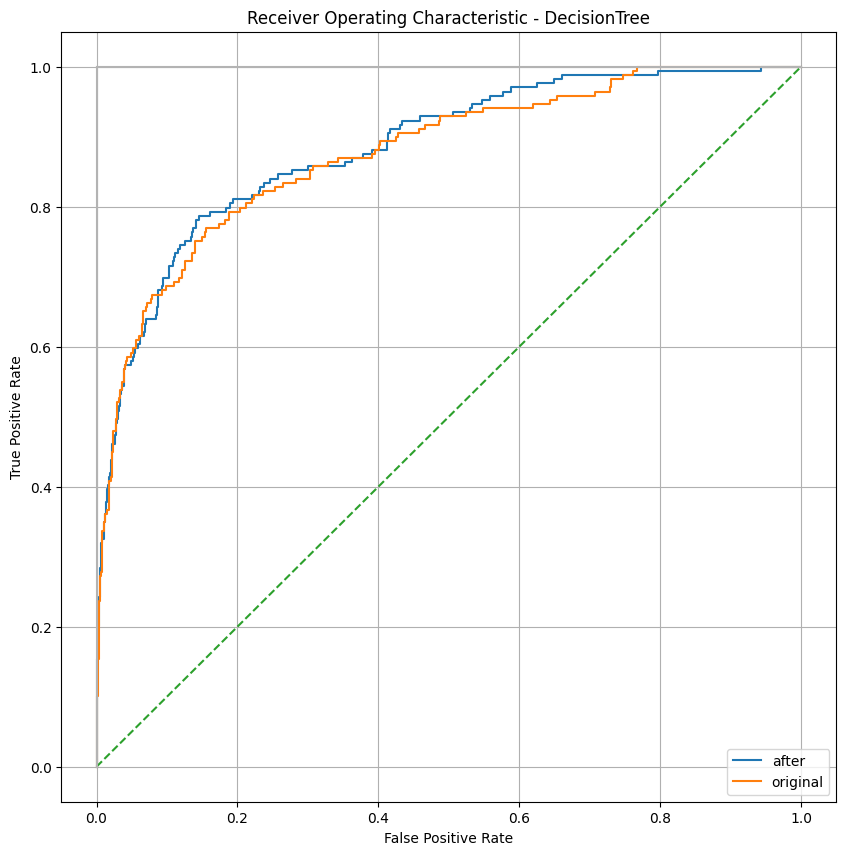

In [329]:
from sklearn.metrics import roc_curve, roc_auc_score
score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f"roc auc score is : {score}")
false_positive_rate1, true_positive_rate1, threshold1 =  roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1,label='after')
plt.plot(false_positive_rate, true_positive_rate , label='original')

plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid()
plt.legend()
plt.show()

In [330]:
print(f'original num of is {len(colB)-1}')
count = 0
num_test = []
num_ops = []
num_diag = []
colBB = col_impo.copy()
for i in col_impo :
    if(i in tests):
        num_test.append(i)
        colBB.remove(i)
    elif(i+' ' in tests):
        num_test.append(i+' ')
        colBB.remove(i+' ')
    if(i in operations):
        num_ops.append(i)
        colBB.remove(i)
    elif(i+' ' in operations):
        num_ops.append(i+' ')
        colBB.remove(i+' ')
    if(i in diagnosis):
        num_diag.append(i)
        colBB.remove(i)
    elif(i+' ' in diagnosis):
        num_diag.append(i+' ')
        colBB.remove(i+' ')
    if(i == 'острый_коронарный_синдром'):
        col_impo.remove(i)
        colBB.remove(i)
print('target острый_коронарный_синдром , importatn feature from personal info :')    
print(colBB)

print()

print(f'test feature is {len(num_test)}')
print(f'operations feature is {len(num_ops)}')
print(f'diagnosis feature is {len(num_diag)}')
print()

print(f'currect num is {len(col_impo)}')

original num of is 812
target острый_коронарный_синдром , importatn feature from personal info :
['B III', 'A II', 'age']

test feature is 198
operations feature is 7
diagnosis feature is 6

currect num is 214


Counter({0: 3010, 1: 3010})
f1 : 0.761959
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1304
           1       0.67      0.50      0.57       169

    accuracy                           0.91      1473
   macro avg       0.80      0.73      0.76      1473
weighted avg       0.91      0.91      0.91      1473

roc auc score is : 0.8686925981050567


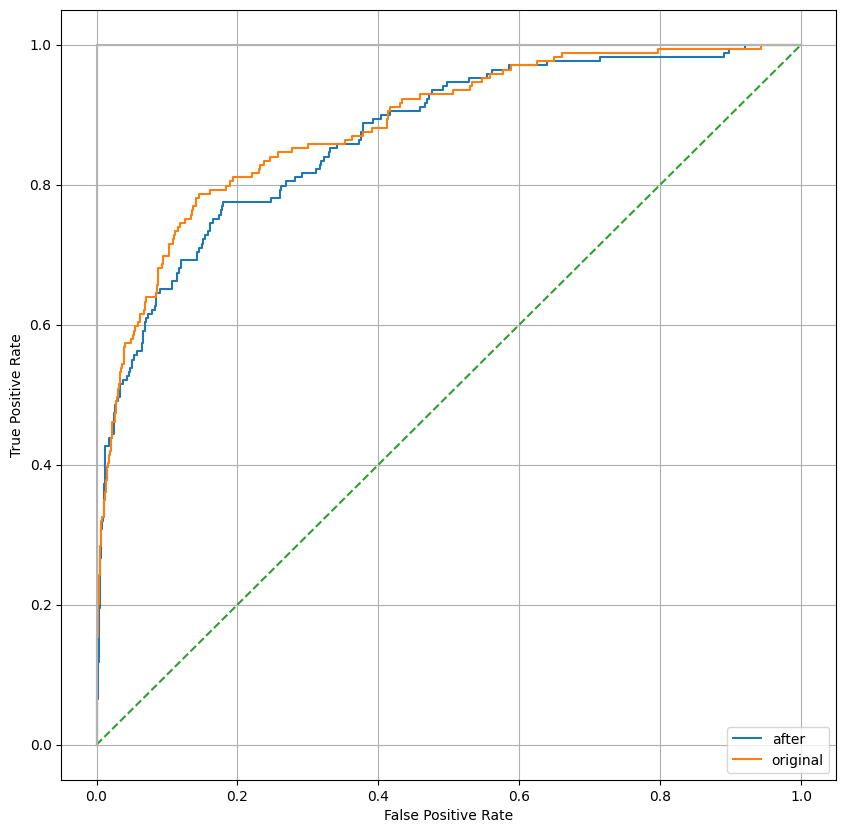

In [331]:

# ------- oversampling ----------
oversample = RandomOverSampler(sampling_strategy='minority')

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=0)

# fit and apply the transform
oversample = SMOTE()
X_over, y_over = oversample.fit_resample(X_train, y_train)
counter = Counter(y_over)
print(counter)



# ------- Train model ----------

model = xgb.XGBClassifier(objective="binary:logistic", random_state=42, eval_metric="auc")


model.fit(X_over, y_over)
y_test_pred = model.predict(X_test)
print('f1 : {:.6f}'.format(
        f1_score(y_test, y_test_pred,average='macro')
))


print(classification_report(y_test, y_test_pred))


# ------- save model ----------


filename = 'final_datasets/острый_коронарный_синдром.pickle'
pickle.dump(model, open(filename, 'wb'))

# ------- rou_auc ----------

score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f"roc auc score is : {score}")
false_positive_rate,true_positive_rate = false_positive_rate1 , true_positive_rate1
false_positive_rate1, true_positive_rate1, threshold1 =  roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.subplots(1, figsize=(10,10))

plt.plot(false_positive_rate1, true_positive_rate1,label='after')
plt.plot(false_positive_rate, true_positive_rate , label='original')

plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.grid()
plt.show()

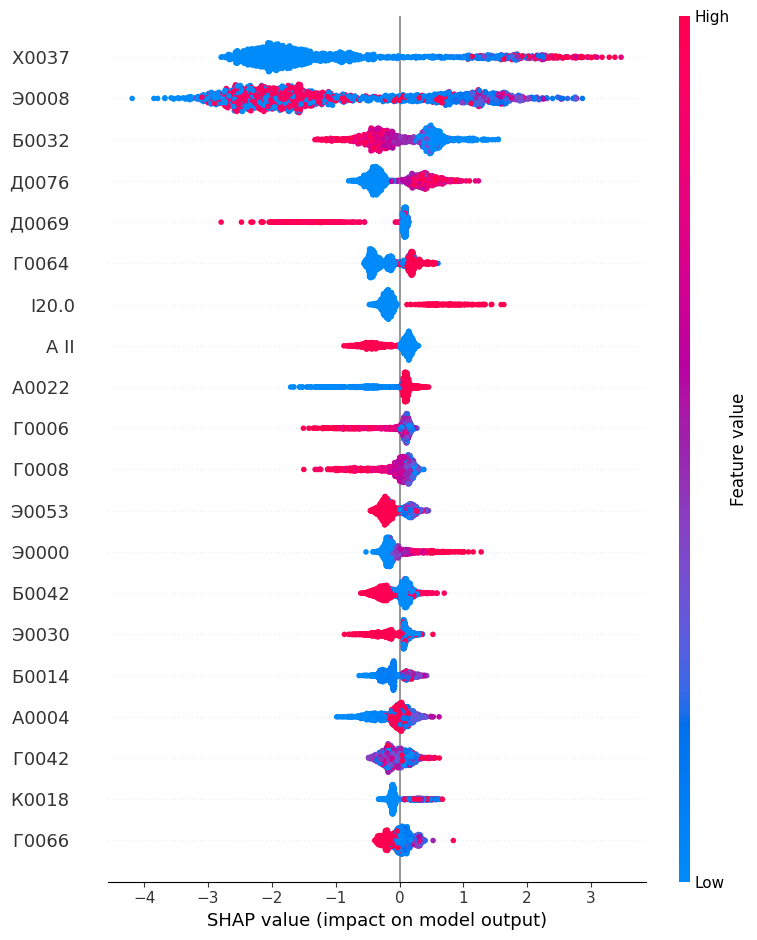

In [332]:
explainer = shap.TreeExplainer(model)

shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

In [333]:
#target онмк


In [334]:
#to calculate original roc auc score 
cols = ['желудочковая_тахикардия','острый_коронарный_синдром',\
                                        'онмк']
X = model_data.drop(cols,axis=1)
y = model_data['онмк']
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=0)


model = xgb.XGBClassifier(objective="binary:logistic", random_state=42, eval_metric="auc")


model.fit(X_train, y_train)
false_positive_rate, true_positive_rate, threshold =  roc_curve(y_test, model.predict_proba(X_test)[:, 1])
score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f"roc auc score is : {score}")

roc auc score is : 0.7974100185528756


In [335]:
X = model_dataC.drop(
               'онмк',axis=1)
y = model_dataC['онмк']
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=0)
model = xgb.XGBClassifier(objective="binary:logistic", random_state=42, eval_metric="auc")


model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
print('f1 : {:.6f}'.format(
        f1_score(y_test, y_test_pred,average='macro')
))
f1b = f1_score(y_test, y_test_pred,average='macro')


f1 : 0.621151


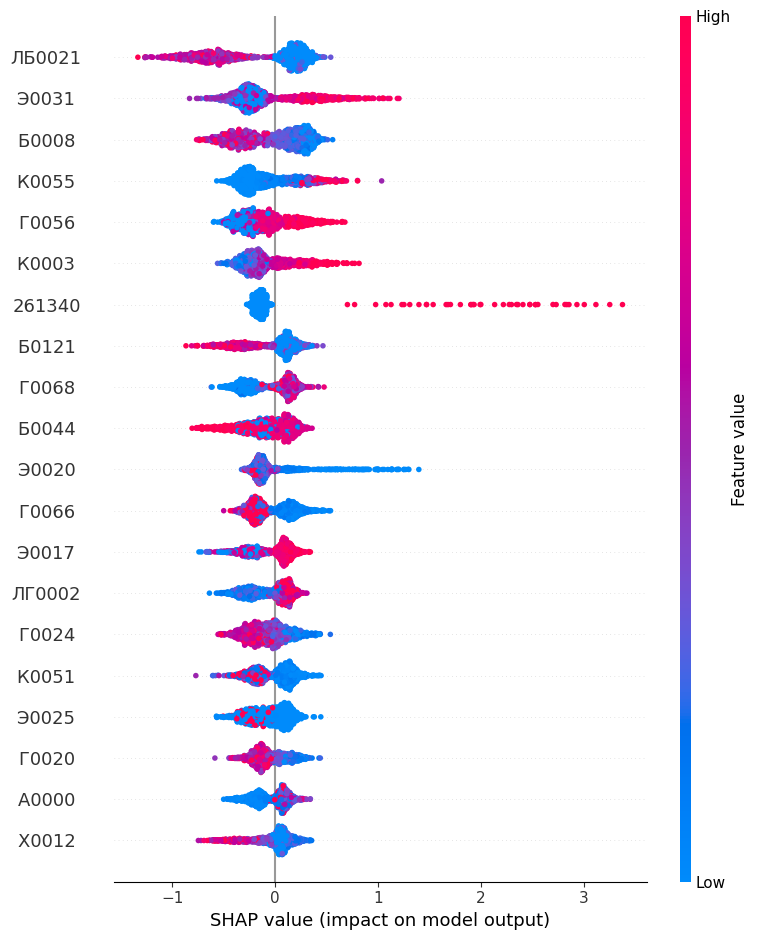

In [336]:

explainer = shap.TreeExplainer(model)

shap_values = explainer.shap_values(X_test)

# paint graph
shap.summary_plot(shap_values, X_test)


vals= np.abs(shap_values).mean(0)
feature_importance = pd.DataFrame(list(zip(X_train.columns,vals)),columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'],ascending=False,inplace=True)
feature_importance = feature_importance[feature_importance['feature_importance_vals']!=0]

col_impo = feature_importance['col_name'].tolist()


In [337]:
# after feature extraction 
col_impo.append('онмк')
model_dataD = model_data[col_impo]
X = model_dataD.drop(
               'онмк',axis=1)
y = model_dataD['онмк']
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=0)
counter = Counter(y_train)
print(counter)

model = xgb.XGBClassifier(objective="binary:logistic", random_state=42, eval_metric="auc")


model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
print('f1 : {:.6f}'.format(
        f1_score(y_test, y_test_pred,average='macro')
))


print(classification_report(y_test, y_test_pred))


Counter({0: 3194, 1: 242})
f1 : 0.605142
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1375
           1       0.78      0.14      0.24        98

    accuracy                           0.94      1473
   macro avg       0.86      0.57      0.61      1473
weighted avg       0.93      0.94      0.92      1473



In [338]:

print(f'original num of is {len(colC)-1}')
count = 0
num_test = []
num_ops = []
num_diag = []
colBB = col_impo.copy()
for i in col_impo :
    if(i in tests):
        num_test.append(i)
        colBB.remove(i)
    elif(i+' ' in tests):
        num_test.append(i+' ')
        colBB.remove(i+' ')
    if(i in operations):
        num_ops.append(i)
        colBB.remove(i)
    elif(i+' ' in operations):
        num_ops.append(i+' ')
        colBB.remove(i+' ')
    if(i in diagnosis):
        num_diag.append(i)
        colBB.remove(i)
    elif(i+' ' in diagnosis):
        num_diag.append(i+' ')
        colBB.remove(i+' ')
    if(i == 'онмк'):
        col_impo.remove(i)
        colBB.remove(i)

print('target онмк , importatn feature from personal info :')    
print(colBB)

print()

print(f'test feature is {len(num_test)}')
print(f'operations feature is {len(num_ops)}')
print(f'diagnosis feature is {len(num_diag)}')
print()

print(f'currect num is {len(col_impo)}')

original num of is 853
target онмк , importatn feature from personal info :
['age', 'Пол', 'A II', '0 I']

test feature is 208
operations feature is 6
diagnosis feature is 4

currect num is 222


roc auc score is : 0.7734990723562151


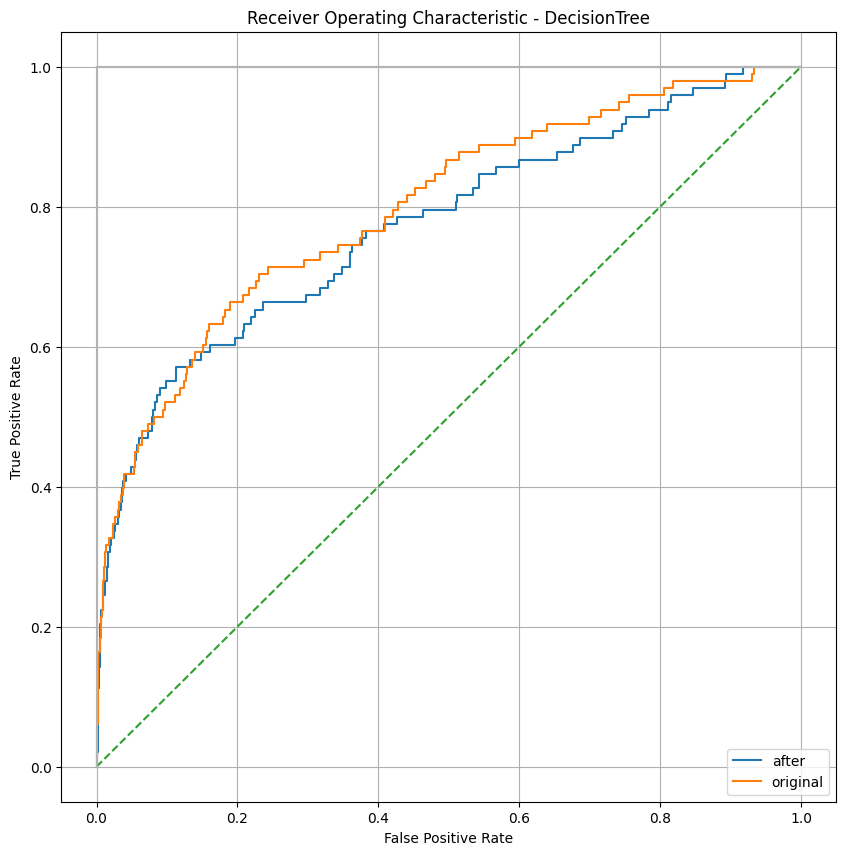

In [339]:

score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f"roc auc score is : {score}")
false_positive_rate1, true_positive_rate1, threshold1 =  roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1,label='after')
plt.plot(false_positive_rate, true_positive_rate , label='original')

plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.grid()
plt.show()

Counter({1: 3194, 0: 3194})
f1 : 0.585075
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1375
           1       0.60      0.12      0.20        98

    accuracy                           0.94      1473
   macro avg       0.77      0.56      0.59      1473
weighted avg       0.92      0.94      0.92      1473

roc auc score is : 0.7429833024118738


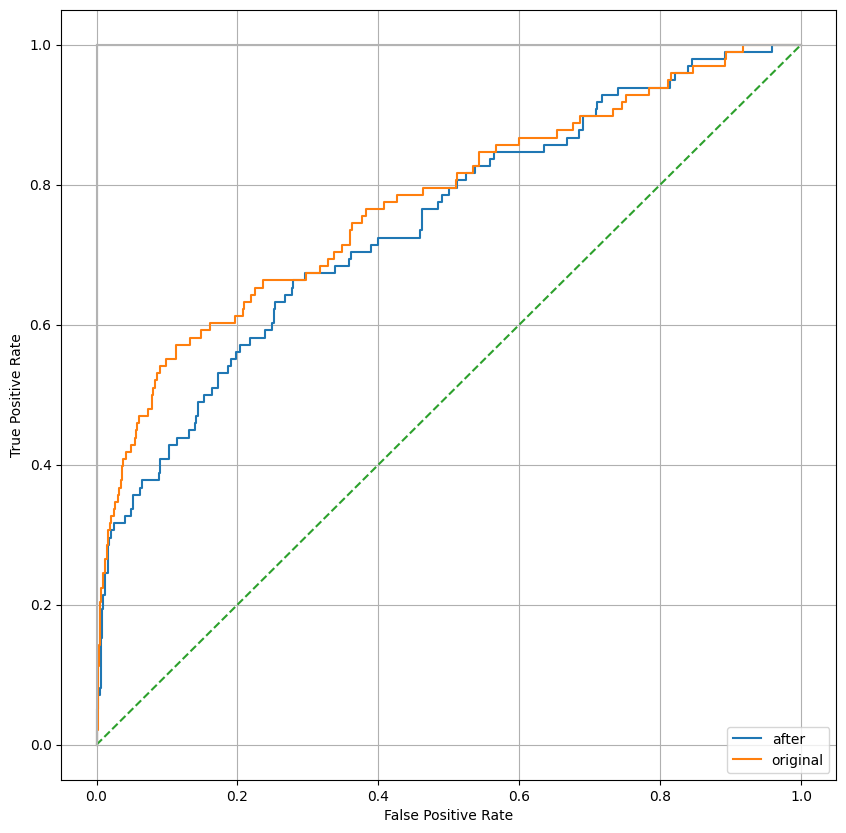

In [340]:

# ------- oversampling ----------
oversample = RandomOverSampler(sampling_strategy='minority')

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=0)

# fit and apply the transform
oversample = SMOTE()
X_over, y_over = oversample.fit_resample(X_train, y_train)
counter = Counter(y_over)
print(counter)



# ------- Train model ----------

model = xgb.XGBClassifier(objective="binary:logistic", random_state=42, eval_metric="auc")


model.fit(X_over, y_over)
y_test_pred = model.predict(X_test)
print('f1 : {:.6f}'.format(
        f1_score(y_test, y_test_pred,average='macro')
))


print(classification_report(y_test, y_test_pred))

# ------- saving model ----------

filename = 'final_datasets/онмк.pickle'
pickle.dump(model, open(filename, 'wb'))

# ------- rou_auc ----------

score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f"roc auc score is : {score}")
false_positive_rate,true_positive_rate = false_positive_rate1 , true_positive_rate1
false_positive_rate1, true_positive_rate1, threshold1 =  roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.subplots(1, figsize=(10,10))

plt.plot(false_positive_rate1, true_positive_rate1,label='after')
plt.plot(false_positive_rate, true_positive_rate , label='original')

plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.grid()
plt.show()

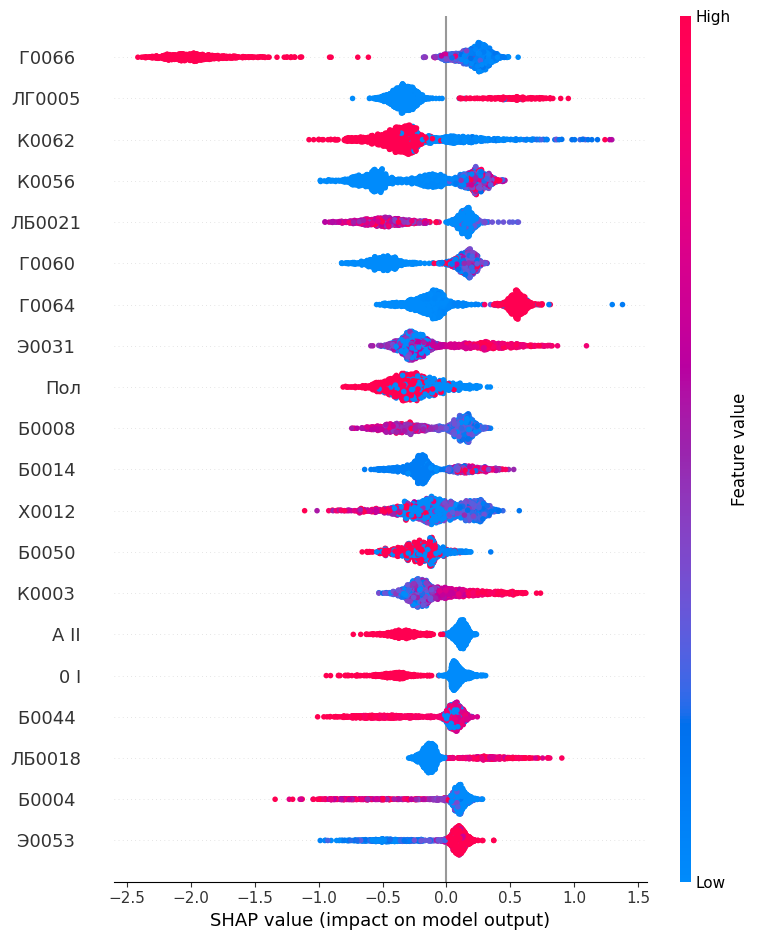

In [341]:
explainer = shap.TreeExplainer(model)

shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

In [342]:
model_data.to_csv('final_datasets/out.csv')